# Data Analysis

In this file, we proceed to develop and test the pipeline that handles our dataset.

Thsi specific file is dedicated to the understanding of the "cancer" dataset provided by the National Cancer Institute, CDG Data Portal.

DATASET was provided by :
https://portal.gdc.cancer.gov/

filter applied were :

- Data Type : Gene Expression Quantification
- Experimental Strategy : RNA-seq
- Access : Open
- Project : TCGA-BRCA


### All the imports for all the things

In [7]:
import os
import sys
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import importlib

import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# to import libs 
sys.path.append('../')
from src.utils import visualisation, benchmark, helpers, monitoring, experiment, search, data_handler

pd.options.display.width = 1000



# just investigating out dataset

In [13]:

#with open('../workfiles/BRCA_ds.pkl', 'rb') as f:
with open('../workfiles/light_BRCA_ds.pkl', 'rb') as f:
    data, metadata = pickle.load(f)

feature_num = len(metadata["feature_names"])
print(feature_num)
print(len(metadata["subtypes"]))
print(len(metadata["sequence_names"]))

3242
1231
1231


In [17]:
pd.Series(metadata["subtypes"]).value_counts()

LumA      616
LumB      230
Basal     202
Her2       90
Normal     41
Name: count, dtype: int64

In [35]:
sum(pd.Series(metadata["subtypes"]).value_counts()) - len(metadata["sequence_names"])

-52

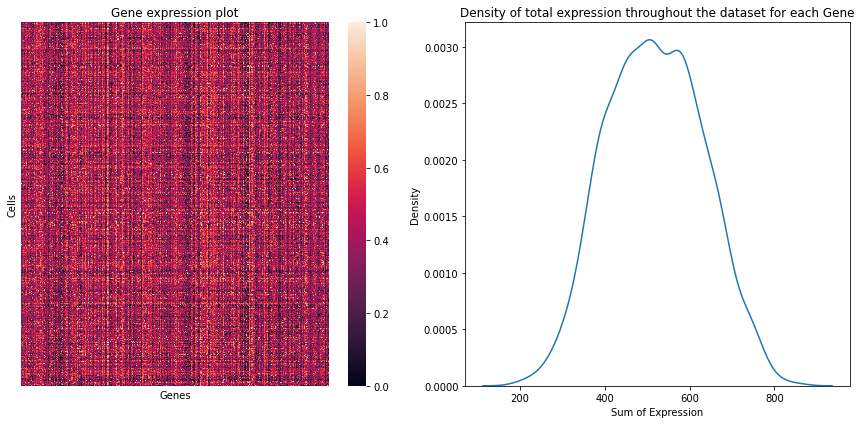

In [18]:
visualisation.dataset_plot(data)

In [23]:
# Convert your NumPy array into a Pandas DataFrame
df = pd.DataFrame(data)

# If you have specific names for your rows and columns, you can assign them as well
# df = pd.DataFrame(data, index=row_names, columns=column_names)

# Assign labels to the DataFrame
df['label'] = metadata["subtypes"]

# It might be necessary to sort the DataFrame based on labels to ensure similar items are grouped together.
# Skip this step if you prefer the clustering algorithm to handle the grouping entirely.
df.sort_values('label', inplace=True)


In [24]:
# Create a color palette that has a distinct color for each label
lut = dict(zip(df['label'].unique(), sns.color_palette("tab10", len(df['label'].unique()))))

# Create a new column of color mappings based on your labels
row_colors = df['label'].map(lut)


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


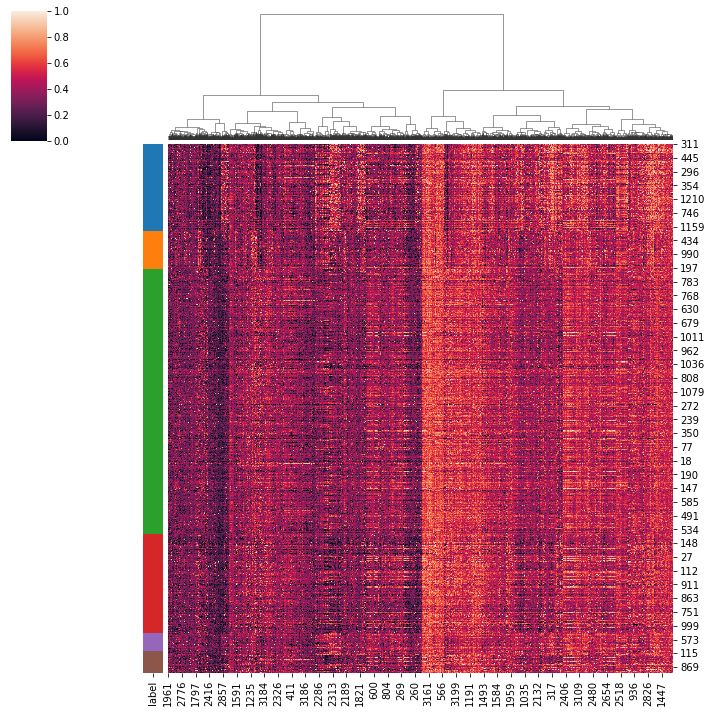

In [28]:
# Remove the 'label' column before plotting if it's not part of the similarity measurement
df_data_only = df.drop('label', axis=1)

# Create a clustermap and integrate your color-coded labels
sns.clustermap(df_data_only, metric="euclidean", standard_scale=1, row_colors=row_colors, method="ward",row_cluster=False)


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


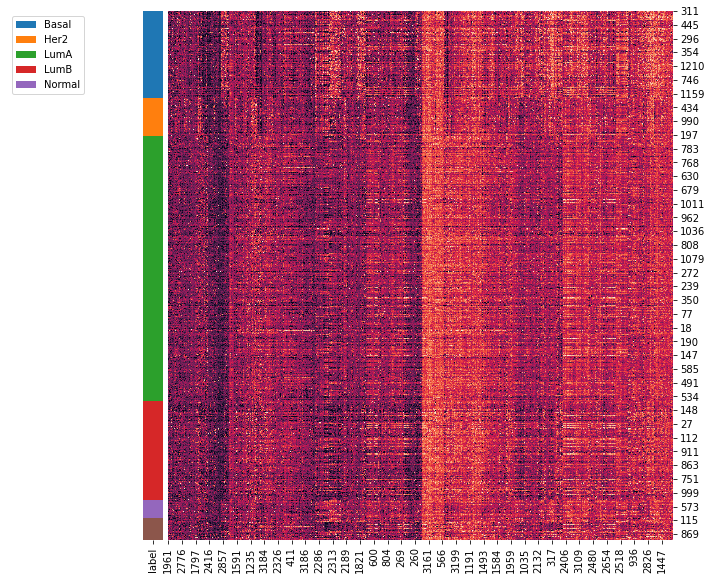

In [39]:


# Create a clustermap and integrate your color-coded labels
clustergrid = sns.clustermap(df_data_only, row_colors=row_colors, method="ward", row_cluster=False)

clustergrid.cax.set_visible(False)
clustergrid.ax_col_dendrogram.set_visible(False)

# Create a legend for the color-coded labels
for label in lut.keys():
    clustergrid.ax_row_dendrogram.bar(0, 0, color=lut[label], label=label, linewidth=0)

clustergrid.ax_row_dendrogram.legend(loc="upper left", ncol=1)

# Show the plot
plt.show()
